# Import software libraries

In [1]:
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import scipy as sp                                          # Apply advanced mathematical functions.
from scipy import stats
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce                              # Encode data.
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- Category Encoders {}'.format(ce.__version__))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.19.2
- pandas 1.1.3
- SciPy 1.5.2
- Matplotlib 3.3.2
- Seaborn 0.11.0
- scikit-learn 0.23.2
- Category Encoders 2.2.2


# Load and preview the data

In [2]:
users_data = pd.read_pickle('data/users_data_cleaned.pickle')

users_data.head(n = 5)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


# Check the shape of the data

In [3]:
users_data.shape

(45209, 19)

# Check the number of unique users

In [4]:
len(np.unique(users_data.user_id))

45209

# Check the data types

In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [6]:
users_data.columns.to_series().groupby(users_data.dtypes).groups

{bool: ['default', 'housing', 'loan', 'term_deposit'], int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['number_transactions', 'total_amount_usd'], datetime64[ns]: ['date_joined'], object: ['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']}

# Check for correlations

In [7]:
users_data.corr().abs()

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,0.163409,0.008813,0.138838,0.030429,0.075319,0.017220,0.026431,0.030751,0.023046,0.053390
total_amount_usd,0.163409,1.000000,0.095839,0.065390,0.066857,0.084526,0.022586,0.017274,0.006435,0.016952,0.050785
age,0.008813,0.095839,1.000000,0.017875,0.185552,0.015641,0.004645,0.004767,0.023745,0.001297,0.025168
default,0.138838,0.065390,0.017875,1.000000,0.006020,0.077232,0.010017,0.016819,0.029982,0.018331,0.022421
housing,0.030429,0.066857,0.185552,0.006020,1.000000,0.041341,0.005041,0.023583,0.124197,0.037087,0.139161
loan,0.075319,0.084526,0.015641,0.077232,0.041341,1.000000,0.012395,0.009972,0.022762,0.011048,0.068193
duration,0.017220,0.022586,0.004645,0.010017,0.005041,0.012395,1.000000,0.084551,0.001549,0.001213,0.394549
campaign,0.026431,0.017274,0.004767,0.016819,0.023583,0.009972,0.084551,1.000000,0.088636,0.032860,0.073179
pdays,0.030751,0.006435,0.023745,0.029982,0.124197,0.022762,0.001549,0.088636,1.000000,0.454817,0.103616
previous,0.023046,0.016952,0.001297,0.018331,0.037087,0.011048,0.001213,0.032860,0.454817,1.000000,0.093232


# Generate summary statistics for all of the data

In [8]:
users_data.describe(datetime_is_numeric = True, include = 'all')

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
count,45209,35210.000000,35210.000000,45209.000000,44921,45209,43352,45209,45209,45209,32191,45209.000000,45209.000000,45209.000000,45209.000000,8252,45209,45179,45115
unique,45209,NaN,NaN,NaN,11,3,3,2,2,2,2,NaN,NaN,NaN,NaN,3,2,NaN,3
top,2dea9e05-137f-45df-9196-38c9273ac7cc,NaN,NaN,NaN,blue-collar,married,secondary,False,True,False,cellular,NaN,NaN,NaN,NaN,failure,False,NaN,mobile
freq,1,NaN,NaN,NaN,9731,27212,23202,44394,25128,37965,29285,NaN,NaN,NaN,NaN,4901,39920,NaN,27504
mean,NaN,3.977052,1369.417751,40.935853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.153067,2.763897,40.199651,0.580349,NaN,NaN,1999-06-14 21:54:38.558619008,NaN
min,NaN,1.000000,-8019.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,1988-01-01 00:00:00,NaN
25%,NaN,2.000000,73.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,1993-09-18 00:00:00,NaN
50%,NaN,3.000000,451.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,1999-06-11 00:00:00,NaN
75%,NaN,4.000000,1438.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,2005-03-18 00:00:00,NaN
max,NaN,20.000000,102127.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4918.000000,63.000000,871.000000,275.000000,NaN,NaN,2010-11-30 00:00:00,NaN


# Generate summary statistics for numerical data only

In [9]:
users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


# Generate modal values for all data

In [10]:
# Drop user ID since it's unique.

users_data.drop(['user_id'], axis = 1).mode()

,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,2.0,0.0,32.0,blue-collar,married,secondary,False,True,False,cellular,124.0,1.0,-1.0,0.0,failure,False,1990-07-05,mobile
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-12-07,NaN


# Generate skewness and kurtosis measurements

In [11]:
users_data.skew()

number_transactions     2.704543
total_amount_usd        8.596128
age                     0.684861
default                 7.245206
housing                -0.224686
loan                    1.852545
duration                3.144556
campaign                4.898555
pdays                   2.615635
previous               41.845672
term_deposit            2.383403
dtype: float64

In [12]:
users_data.kurt()

number_transactions       6.659034
total_amount_usd        150.790967
age                       0.319760
default                  50.495241
housing                  -1.949602
loan                      1.431987
duration                 18.155941
campaign                 39.248145
pdays                     6.934713
previous               4506.684640
term_deposit              3.680770
dtype: float64

# Plot histograms for all numerical columns

In [13]:
users_data_for_hist = \
users_data.select_dtypes(exclude = ['bool'])

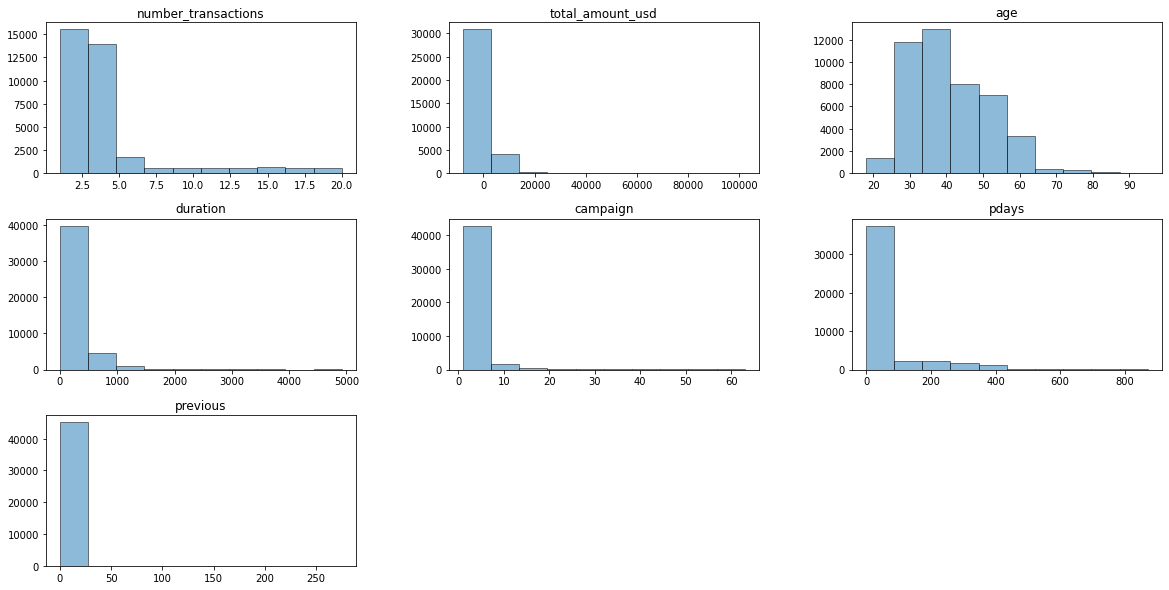

In [14]:
users_data_for_hist.hist(figsize = (20, 10), alpha = 0.5,
                         edgecolor = 'black', grid = False);

# Generate a box plot for `age`

In [15]:
users_data['age'].describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

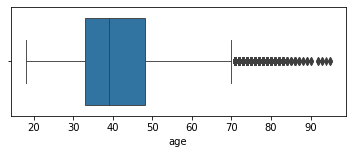

In [16]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = users_data['age'], linewidth = 0.9);

# Generate a violin plot for `age`

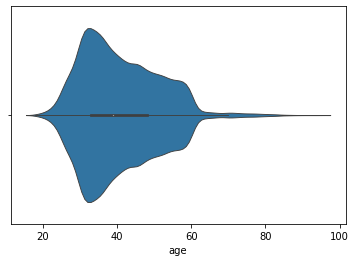

In [17]:
sns.violinplot(x = users_data['age'], linewidth = 0.9);

# Generate a box plot for `number_transactions`

In [18]:
users_data['number_transactions'].describe()

count    35210.000000
mean         3.977052
std          3.814329
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         20.000000
Name: number_transactions, dtype: float64

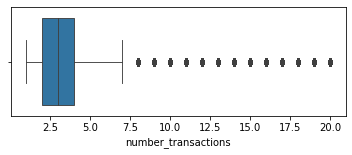

In [19]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = users_data['number_transactions'],
           linewidth = 0.9);

# Generate a violin plot for `number_transactions`

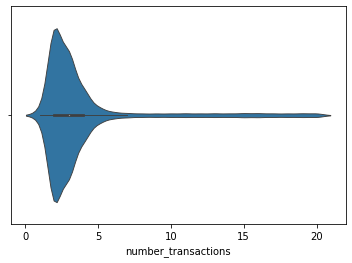

In [20]:
sns.violinplot(x = users_data['number_transactions'],
              linewidth = 0.9);

# Generate scatter plots comparing `total_amount_usd` to `number_transactions`

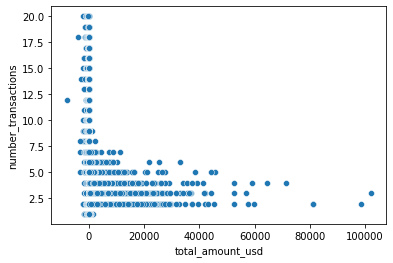

In [21]:
sns.scatterplot(data = users_data, x = 'total_amount_usd',
               y = 'number_transactions');

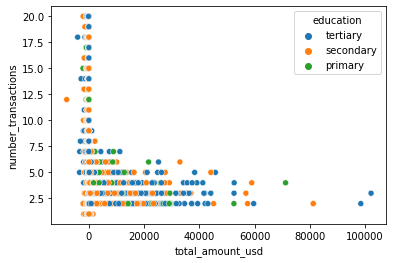

In [22]:
sns.scatterplot(data = users_data, x = 'total_amount_usd',
               y = 'number_transactions', hue = 'education');

# Generate a line plot for `total_amount_usd`

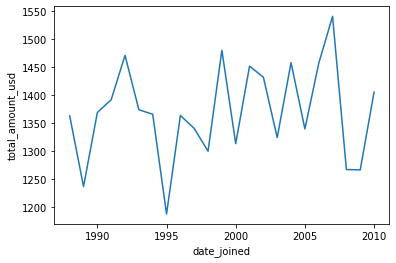

In [23]:
years = users_data['date_joined'].dt.year

sns.lineplot(data = users_data, x = years,
            y = 'total_amount_usd',
            estimator = np.mean);

# Generate bar charts for `job`

In [24]:
users_job_dist = \
users_data['job'].value_counts(dropna = False)

users_job_dist

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

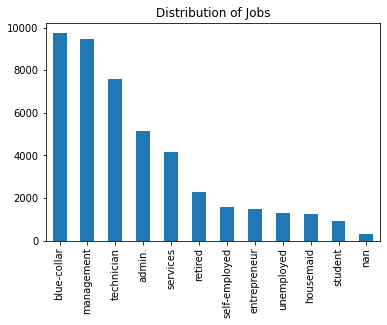

In [25]:
# Vertical bar chart.

users_job_dist.plot(kind = 'bar')
plt.title('Distribution of Jobs');

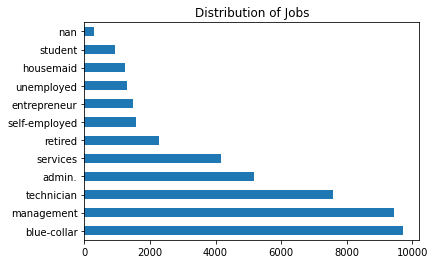

In [26]:
# Horizontal bar chart

users_job_dist.plot(kind = 'barh')
plt.title('Distribution of Jobs');

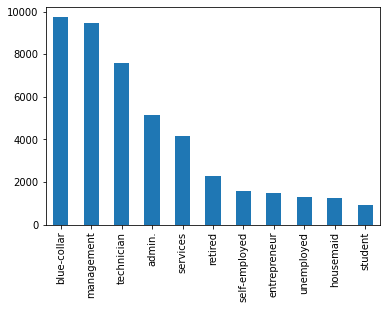

In [27]:
# Exclude missing values.

users_data['job'].value_counts().plot(kind = 'bar');

# Generate a bar chart for `marital`

In [28]:
users_marital_dist = \
users_data['marital'].value_counts(dropna = False)

users_marital_dist

married     27212
single      12790
divorced     5207
Name: marital, dtype: int64

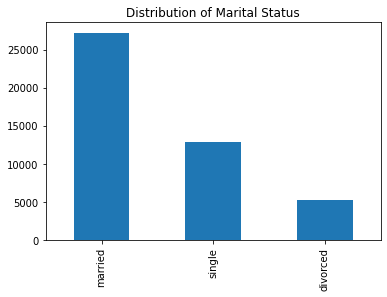

In [29]:
users_marital_dist.plot(kind = 'bar')
plt.title('Distribution of Marital Status');

# Generate a bar chart for `education`

In [30]:
users_education_dist = \
users_data['education'].value_counts(dropna = False)

users_education_dist

secondary    23202
tertiary     13300
primary       6850
NaN           1857
Name: education, dtype: int64

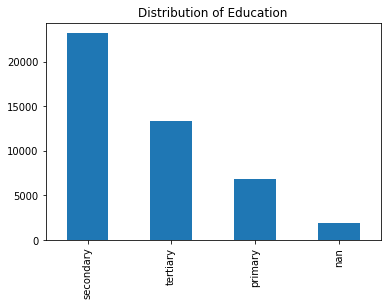

In [31]:
users_education_dist.plot(kind = 'bar')
plt.title('Distribution of Education');

# Generate a bar chart for `contact`

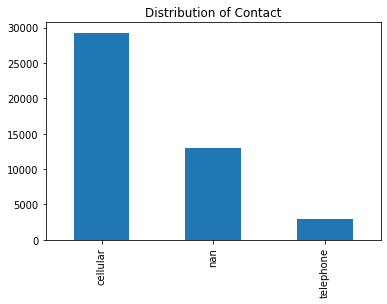

In [32]:
users_contact_dist = \
users_data['contact'].value_counts(dropna = False)

users_contact_dist.plot(kind = 'bar')
plt.title('Distribution of Contact');

# Generate a bar chart for `poutcome`

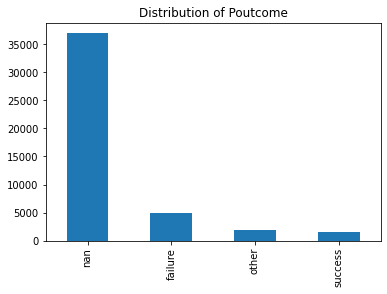

In [33]:
users_poutcome_dist = \
users_data['poutcome'].value_counts(dropna = False)

users_poutcome_dist.plot(kind = 'bar')
plt.title('Distribution of Poutcome');

# Generate a bar chart for `default`

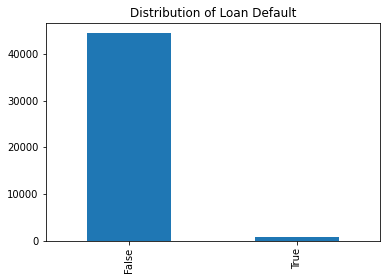

In [34]:
users_default_dist = \
users_data['default'].value_counts(dropna = False)

users_default_dist.plot(kind = 'bar')
plt.title('Distribution of Loan Default');

# Generate a bar chart for `device`

In [35]:
users_device_dist = \
users_data['device'].value_counts(dropna = False)

users_device_dist

mobile     27504
desktop    12112
tablet      5499
NaN           94
Name: device, dtype: int64

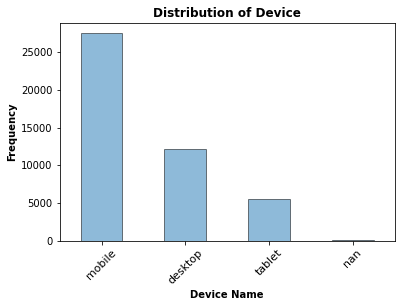

In [36]:
users_device_dist.plot(kind = 'bar',
                      alpha = 0.5, edgecolor = 'black')
plt.title('Distribution of Device',
         size = 12, weight = 'bold')
plt.xticks(rotation = 45, size = 11)
plt.xlabel('Device Name', size = 10, weight = 'bold')
plt.ylabel('Frequency', size = 10, weight = 'bold')
plt.show();

# Generate a heatmap for the feature correlations

In [37]:
corr_matrix = users_data.corr()

corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


<AxesSubplot:>

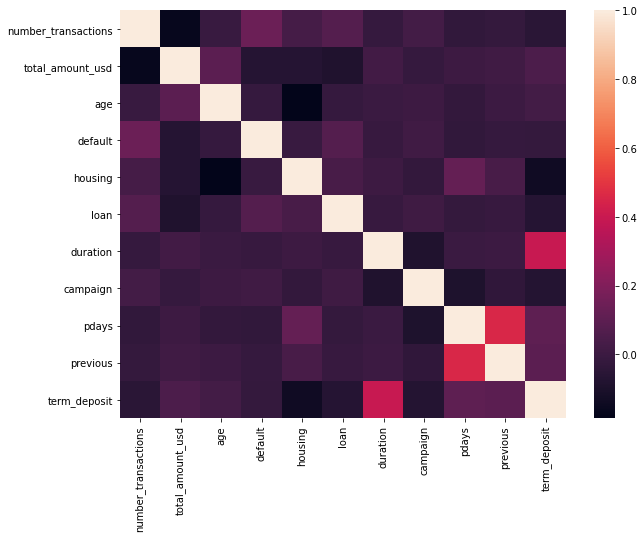

In [38]:
fig = plt.figure(figsize = (10, 7.5))

sns.heatmap(corr_matrix)

# Format the heatmap to make it easier to read

Text(0.5, 1.0, 'Correlation Plot')

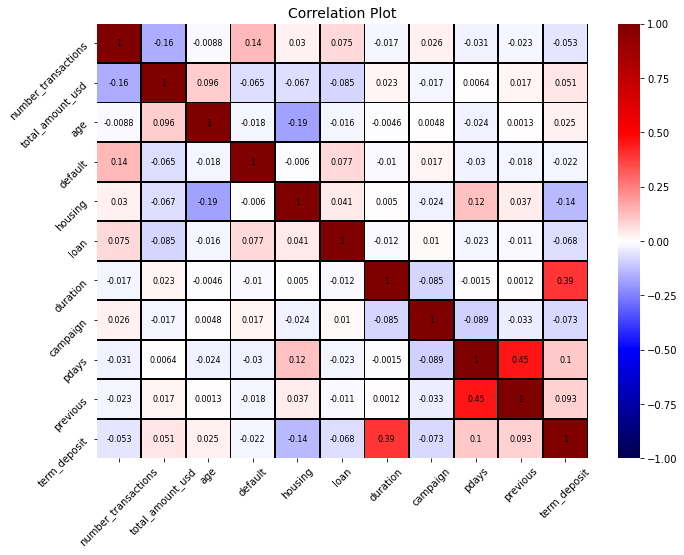

In [39]:
fig = plt.figure(figsize = (11, 8))

sns.heatmap(corr_matrix,
           cmap = 'seismic',
           linewidth = 0.75,
           linecolor = 'black',
           cbar = True,
           vmin = -1,
           vmax = 1,
           annot = True,
           annot_kws = {'size': 8, 'color': 'black'})

plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot', size = 14)

# Identify missing values

In [40]:
users_data.isnull().sum()

user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

# Identify the percentage of missing values for each feature

In [41]:
percent_missing = users_data.isnull().mean()

percent_missing

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

# Generate a missing value report

In [42]:
def missing_value_pct_df(data):
    """Create a DataFrame to summarize missing values."""
  
    percent_missing = data.isnull().mean() 
    missing_value_df = \
    pd.DataFrame(percent_missing).reset_index()
    
    missing_value_df = \
    missing_value_df.rename(columns = {'index': 'column_name',
                                       0: 'percent_missing'})

    # Multiply by 100 and round to 4 decimal places.
    missing_value_df['percent_missing'] = \
    missing_value_df['percent_missing']. \
    apply(lambda x: round(x * 100, 2)) 

    missing_value_df = \
    missing_value_df.sort_values(by = ['percent_missing'],
                                 ascending = False)

    return missing_value_df

In [43]:
missing_value_df = missing_value_pct_df(users_data)

missing_value_df

,column_name,percent_missing
15,poutcome,81.75
10,contact,28.80
2,total_amount_usd,22.12
1,number_transactions,22.12
6,education,4.11
4,job,0.64
18,device,0.21
17,date_joined,0.07
12,campaign,0.00
16,term_deposit,0.00


# Remove features with a high percentage of missing values

In [44]:
# Threshold above which to drop feature.

threshold = 80

cols_to_drop = \
list(missing_value_df[missing_value_df['percent_missing'] \
                     > threshold]['column_name'])

print('Number of features to drop:',
     missing_value_df[ \
                     missing_value_df['percent_missing'] > threshold].shape[0])

print(f'Features with missing values greater than {threshold}%:',
     cols_to_drop)

Number of features to drop: 1
Features with missing values greater than 80%: ['poutcome']


In [45]:
users_data_cleaned = users_data.drop(cols_to_drop, axis = 1)

In [46]:
# Confirm feature was dropped.

missing_value_df = missing_value_pct_df(users_data_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                      > 0]['column_name'])

print('Number of features with missing values:',
     len(missing_columns))

Number of features with missing values: 7


# Identify numerical data with missing values

In [47]:
dtypes = ['int64', 'float64']

numerical_columns = \
list(users_data_cleaned.select_dtypes(dtypes).columns)

print('Numerical features with missing values:',
     list(set(numerical_columns).intersection(missing_columns)))

Numerical features with missing values: ['total_amount_usd', 'number_transactions']


# Impute missing data values for `total_amount_usd`

In [48]:
# Find a sample user with missing value

sample_user = \
users_data_cleaned[users_data_cleaned['total_amount_usd']. \
                  isnull()].sample(1).user_id

sample_user

21738    84c1cb96-71a6-4705-af78-7d6670cb6438
Name: user_id, dtype: object

In [49]:
# Print mean of total_amount_usd.

print('Mean total_amount_usd:',
     round(users_data_cleaned['total_amount_usd'].mean(), 2))


# Impute missing values for total_amount_usd with mean.

users_data_cleaned['total_amount_usd']. \
fillna(round(users_data_cleaned['total_amount_usd'].mean(), 2),
      inplace = True)

Mean total_amount_usd: 1369.42


In [50]:
users_data_cleaned[users_data_cleaned. \
                  user_id.isin(sample_user)]['total_amount_usd']

21738    1369.42
Name: total_amount_usd, dtype: float64

# Replace missing values for `number_transactions` with `0`

In [51]:
users_data_cleaned['number_transactions']. \
fillna(0, inplace = True)

In [52]:
users_data_cleaned[users_data_cleaned. \
                  user_id.isin(sample_user)]['number_transactions']

21738    0.0
Name: number_transactions, dtype: float64

# Identify categorical data with missing values

In [53]:
categorical_columns = \
list(users_data_cleaned.select_dtypes(['object']).columns)

print('Categorical features with missing values:',
     list(set(categorical_columns).intersection(missing_columns)))

Categorical features with missing values: ['job', 'device', 'education', 'contact']


# Replace categorical missing values with `'Unknown'`

In [54]:
users_data_cleaned.device.fillna('Unknown', inplace = True)
users_data_cleaned.contact.fillna('Unknown', inplace = True)
users_data_cleaned.job.fillna('Unknown', inplace = True)
users_data_cleaned.education.fillna('Unknown', inplace = True)

In [55]:
users_data_cleaned.device.value_counts()

mobile     27504
desktop    12112
tablet      5499
Unknown       94
Name: device, dtype: int64

# Check if there are any other missing values

In [56]:
missing_value_df = missing_value_pct_df(users_data_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                     > 0]['column_name'])

print('Number of features with missing values:', len(missing_columns))
print('Features with missing values:', missing_columns)

Number of features with missing values: 1
Features with missing values: ['date_joined']


# Remove all rows where `date_joined` is missing

In [57]:
print('Number of users with corrupted data:',
     users_data_cleaned[users_data_cleaned['date_joined']. \
                       isnull()].shape[0])

Number of users with corrupted data: 30


In [58]:
# Remove corrupted data.

users_data_cleaned = \
users_data_cleaned[~users_data_cleaned['date_joined'].isnull()]

In [59]:
# Check to see if any corrupted rows remain.

print('Number of users_with corrupted data:',
     users_data_cleaned[users_data_cleaned['date_joined']. \
                       isnull()].shape[0])

Number of users_with corrupted data: 0


# Perform one last check for missing values

In [60]:
missing_value_df = missing_value_pct_df(users_data_cleaned)

missing_columns = \
list(missing_value_df[missing_value_df['percent_missing'] \
                     > 0]['column_name'])

print('Number of features with missing values:',
     len(missing_columns))

Number of features with missing values: 0


# View the distribution of `age`

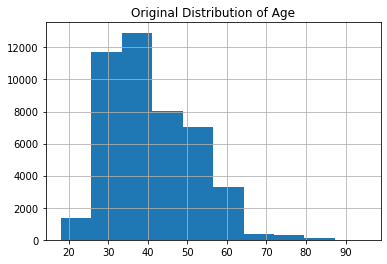

In [61]:
users_data_cleaned['age'].hist()
plt.title('Original Distribution of Age');

# Apply a log transformation to `age`

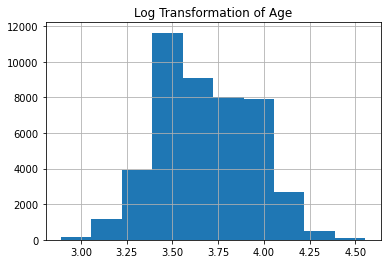

In [62]:
np.log(users_data_cleaned['age']).hist()
plt.title('Log Transformation of Age');

# Apply a Box–Cox transformation to `age`

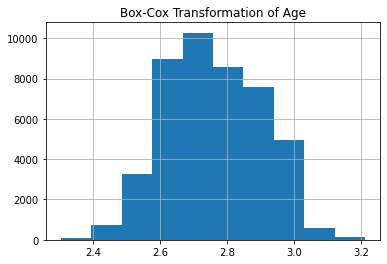

In [63]:
from scipy import stats

pd.Series(stats.boxcox(users_data_cleaned['age'])[0]).hist()
plt.title('Box-Cox Transformation of Age');

# Identify categorical features

In [64]:
categorical_columns = \
list(users_data_cleaned.select_dtypes(['object']).columns)

print('The number of categorical features:',
     len(categorical_columns))
print('The names of categorical features:',
     categorical_columns)

The number of categorical features: 6
The names of categorical features: ['user_id', 'job', 'marital', 'education', 'contact', 'device']


# One-hot encode `job`

In [65]:
users_data_cleaned.job.value_counts(dropna = True)

blue-collar      9725
management       9453
technician       7592
admin.           5168
services         4152
retired          2262
self-employed    1577
entrepreneur     1485
unemployed       1301
housemaid        1239
student           937
Unknown           288
Name: job, dtype: int64

In [66]:
# Create object for one-hot encoding.

encoder = ce.OneHotEncoder(cols = 'job',
                          return_df = True,
                          use_cat_names = True)

In [67]:
# Fit and transform data.

users_data_encoded = encoder.fit_transform(users_data_cleaned)

# Preview the data.

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,housing,loan,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,True,False,Unknown,261,1,-1,0,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,True,False,Unknown,151,1,-1,0,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,True,True,Unknown,76,1,-1,0,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,True,False,Unknown,92,1,-1,0,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,False,False,Unknown,198,1,-1,0,False,1995-08-01,mobile


In [68]:
list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device']

In [69]:
print('Shape of data before encoding:',
     users_data_cleaned.shape)

print('Shape of data after encoding:',
     users_data_encoded.shape)

Shape of data before encoding: (45179, 18)
Shape of data after encoding: (45179, 29)


# Dummy encode `marital`

In [70]:
marital_encoded = \
pd.get_dummies(data = users_data_encoded['marital'],
              drop_first = True)

marital_encoded

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
45211,1,0
45212,0,0
45213,1,0
45214,1,0


In [71]:
# Conncatenate the new encoded columns.

users_data_encoded = \
pd.concat([users_data_encoded, marital_encoded], axis = 1)

# Drop the original variable.

users_data_encoded.drop(['marital'], axis = 1, inplace = True)

# Preview the data

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,contact,duration,campaign,pdays,previous,term_deposit,date_joined,device,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,Unknown,261,1,-1,0,False,1998-08-23,mobile,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,Unknown,151,1,-1,0,False,2008-07-15,desktop,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,Unknown,76,1,-1,0,False,2002-06-04,mobile,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,Unknown,92,1,-1,0,False,1995-06-29,tablet,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,Unknown,198,1,-1,0,False,1995-08-01,mobile,0,1


In [72]:
print('Shape of data after encoding:',
     users_data_encoded.shape)

list(users_data_encoded)

Shape of data after encoding: (45179, 30)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device',
 'married',
 'single']

# One-hot encode the remaining categorical variables

In [73]:
cols = ['education', 'contact', 'device']

encoder = ce.OneHotEncoder(cols = cols,
                          return_df = True,
                          use_cat_names = True)

In [74]:
# Fit and transform data.

users_data_encoded = encoder.fit_transform(users_data_encoded)

# Preview the data.

users_data_encoded.head()

,user_id,number_transactions,total_amount_usd,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_Unknown,job_retired,...,pdays,previous,term_deposit,date_joined,device_mobile,device_desktop,device_tablet,device_Unknown,married,single
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,58,1,0,0,0,0,0,...,-1,0,False,1998-08-23,1,0,0,0,1,0
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,44,0,1,0,0,0,0,...,-1,0,False,2008-07-15,0,1,0,0,0,1
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,33,0,0,1,0,0,0,...,-1,0,False,2002-06-04,1,0,0,0,1,0
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,47,0,0,0,1,0,0,...,-1,0,False,1995-06-29,0,0,1,0,1,0
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,33,0,0,0,0,1,0,...,-1,0,False,1995-08-01,1,0,0,0,0,1


In [75]:
print('Shape of data after encoding:',
     users_data_encoded.shape)

list(users_data_encoded)

Shape of data after encoding: (45179, 38)


['user_id',
 'number_transactions',
 'total_amount_usd',
 'age',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single']

# Discretize `age` into bins

In [76]:
users_data_encoded.age.describe()

count    45179.000000
mean        40.935103
std         10.618499
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [77]:
# Define age bins and labels.

bins = [18, 25, 35, 45, 55, 65, 75, 110]
labels = ['18–24', '25–34', '35–44',
          '45–54', '55–64', '65–74', '75+']

# Perform binning using bin list.

users_data_encoded['age_group'] = \
pd.cut(users_data_encoded['age'], bins = bins,
      labels = labels, right = False)

# Map bins to integer values.
users_data_encoded['age_group_encoded'] = \
users_data_encoded['age_group'].cat.codes

In [78]:
# Verify correct binning.

age_vars = ['age_group_encoded', 'age_group', 'age']

users_data_encoded[age_vars].sample(10)

,age_group_encoded,age_group,age
38300,1,25–34,34
30391,1,25–34,34
10059,3,45–54,48
36998,4,55–64,57
37706,3,45–54,50
25911,2,35–44,38
16866,2,35–44,38
44670,1,25–34,25
11313,3,45–54,48
12342,1,25–34,25


# Plot the new distribution of `age`

In [80]:
user_age_dist = users_data_encoded.age_group.value_counts()

user_age_dist

35–44    14524
25–34    14194
45–54     9951
55–64     4892
18–24      809
65–74      510
75+        299
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Distribution of Age Category')

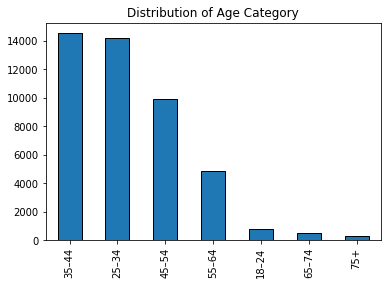

In [81]:
user_age_dist.plot(kind = 'bar', edgecolor = 'black')
plt.title('Distribution of Age Category')

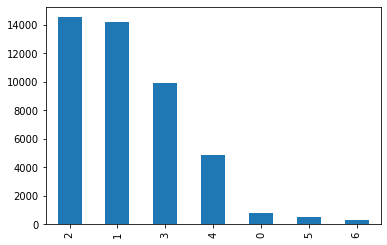

In [82]:
# Check against encoded values.

users_data_encoded.age_group_encoded. \
value_counts().plot(kind = 'bar');

# Drop the `age` and `age_group` variables

In [83]:
users_data_encoded.drop(['age', 'age_group'], 
                       axis = 1, inplace = True)

list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'date_joined',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded']

# Create a `month_joined` variable from `date_joined`

In [84]:
users_data_encoded['month_joined'] = \
users_data_encoded.date_joined.dt.month

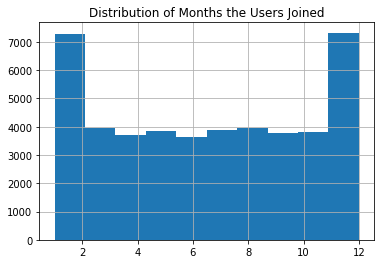

In [85]:
# View the distribution of data.

users_data_encoded['month_joined'].hist()
plt.title('Distribution of Months the Users Joined');

In [86]:
users_data_encoded.drop(['date_joined'],
                       axis = 1, inplace = True)
list(users_data_encoded)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_Unknown',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'device_Unknown',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

# Remove features with low variance

In [87]:
users_data_encoded.std()

number_transactions       3.749994
total_amount_usd       2704.291321
job_management            0.406767
job_technician            0.373908
job_entrepreneur          0.178296
job_blue-collar           0.411004
job_Unknown               0.079587
job_retired               0.218087
job_admin.                0.318287
job_services              0.288889
job_self-employed         0.183543
job_unemployed            0.167236
job_housemaid             0.163318
job_student               0.142513
education_tertiary        0.455691
education_secondary       0.499832
education_Unknown         0.198480
education_primary         0.358591
default                   0.133095
housing                   0.496878
loan                      0.366802
contact_Unknown           0.452851
contact_cellular          0.477695
contact_telephone         0.245250
duration                257.281109
campaign                  3.097836
pdays                   100.134967
previous                  2.303009
term_deposit        

In [88]:
# Define standard deviation threshold.

threshold = 0.1

# Identify features below threshold.

cols_to_drop = \
list(users_data_encoded.std()[users_data_encoded.std() \
                             < threshold].index.values)

print('Features with low standard deviation:',
     cols_to_drop)

Features with low standard deviation: ['job_Unknown', 'device_Unknown']


In [89]:
# Drop features below threshold.

users_data_interim = users_data_encoded.drop(cols_to_drop,
                                            axis = 1)

list(users_data_interim)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_Unknown',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_mobile',
 'device_desktop',
 'device_tablet',
 'married',
 'single',
 'age_group_encoded',
 'month_joined']

# Drop highly correlated features

In [90]:
# Define correlation threshold.

threshold = 0.75

corr_matrix = users_data_encoded.corr().abs()
high_corr_var = np.where(corr_matrix >= threshold)
high_corr_var = [(corr_matrix.index[x],
                 corr_matrix.columns[y],
                 round(corr_matrix.iloc[x, y], 2))
                for x, y in zip(*high_corr_var)
                if x != y and x < y]

high_corr_var

[('contact_Unknown', 'contact_cellular', 0.86),
 ('device_mobile', 'device_desktop', 0.75),
 ('married', 'single', 0.77)]

In [93]:
# Tidy up the output.

record_collinear = pd.DataFrame(high_corr_var). \
rename(columns = {0: 'drop_feature',
                 1: 'corr_feature',
                 2: 'corr_values'})

record_collinear = record_collinear. \
sort_values(by = 'corr_values', ascending = False)

record_collinear = record_collinear.reset_index(drop = True)

record_collinear

,drop_feature,corr_feature,corr_values
0,contact_Unknown,contact_cellular,0.86
1,married,single,0.77
2,device_mobile,device_desktop,0.75


In [94]:
cols_to_drop = list(record_collinear['drop_feature'])
print(cols_to_drop)

['contact_Unknown', 'married', 'device_mobile']


In [95]:
users_data_final = users_data_interim.drop(cols_to_drop,
                                          axis = 1)

list(users_data_final)

['user_id',
 'number_transactions',
 'total_amount_usd',
 'job_management',
 'job_technician',
 'job_entrepreneur',
 'job_blue-collar',
 'job_retired',
 'job_admin.',
 'job_services',
 'job_self-employed',
 'job_unemployed',
 'job_housemaid',
 'job_student',
 'education_tertiary',
 'education_secondary',
 'education_Unknown',
 'education_primary',
 'default',
 'housing',
 'loan',
 'contact_cellular',
 'contact_telephone',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'device_desktop',
 'device_tablet',
 'single',
 'age_group_encoded',
 'month_joined']

# Filter by demographics data

In [97]:
users_data_demographics = \
users_data_final.filter(regex = 'education|job|age|single')

users_data_demographics.head(n = 3)

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


# Standardize the demographics data

In [98]:
users_data_demographics.describe()

,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,education_tertiary,education_secondary,education_Unknown,education_primary,single,age_group_encoded
count,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000,45179.000000
mean,0.209234,0.168043,0.032869,0.215255,0.050068,0.114389,0.091901,0.034906,0.028797,0.027424,0.020740,0.294207,0.513159,0.041081,0.151553,0.282897,2.147170
std,0.406767,0.373908,0.178296,0.411004,0.218087,0.318287,0.288889,0.183543,0.167236,0.163318,0.142513,0.455691,0.499832,0.198480,0.358591,0.450412,1.106811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [99]:
scaler = StandardScaler()

scaler.fit(users_data_demographics)
users_data_scaled = scaler.transform(users_data_demographics)

print('New standard deviation:', users_data_scaled.std())
print('New mean:              ', round(users_data_scaled.mean()))

New standard deviation: 1.0
New mean:               0


# Perform PCA to reduce the dimensionality of the demographics dataset

In [100]:
pca = PCA(n_components = 2, random_state = 1)

pca.fit(users_data_scaled)

reduced = pca.transform(users_data_scaled)

In [101]:
reduced_df = pd.DataFrame(reduced, columns = ['PCA1', 'PCA2'])

reduced_df

,PCA1,PCA2
0,2.557545,1.079613
1,-0.820505,-1.750581
2,-0.576607,-0.551404
3,-0.541647,1.593626
4,0.385598,-0.614768
...,...,...
45174,1.160485,0.073978
45175,-0.660738,4.371075
45176,-1.327676,2.367745
45177,-1.575612,1.040206


# Load the final dataset

In [102]:
users_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null 

In [103]:
reduced_df.to_pickle('users_data_demo_pca.pickle')